# Model Demo

In [1]:
import os
if not os.path.exists('BLIP'):
    !git clone https://github.com/salesforce/BLIP

In [2]:
import torch
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from BLIP.models.blip import blip_decoder
from BLIP.models.blip_vqa import blip_vqa

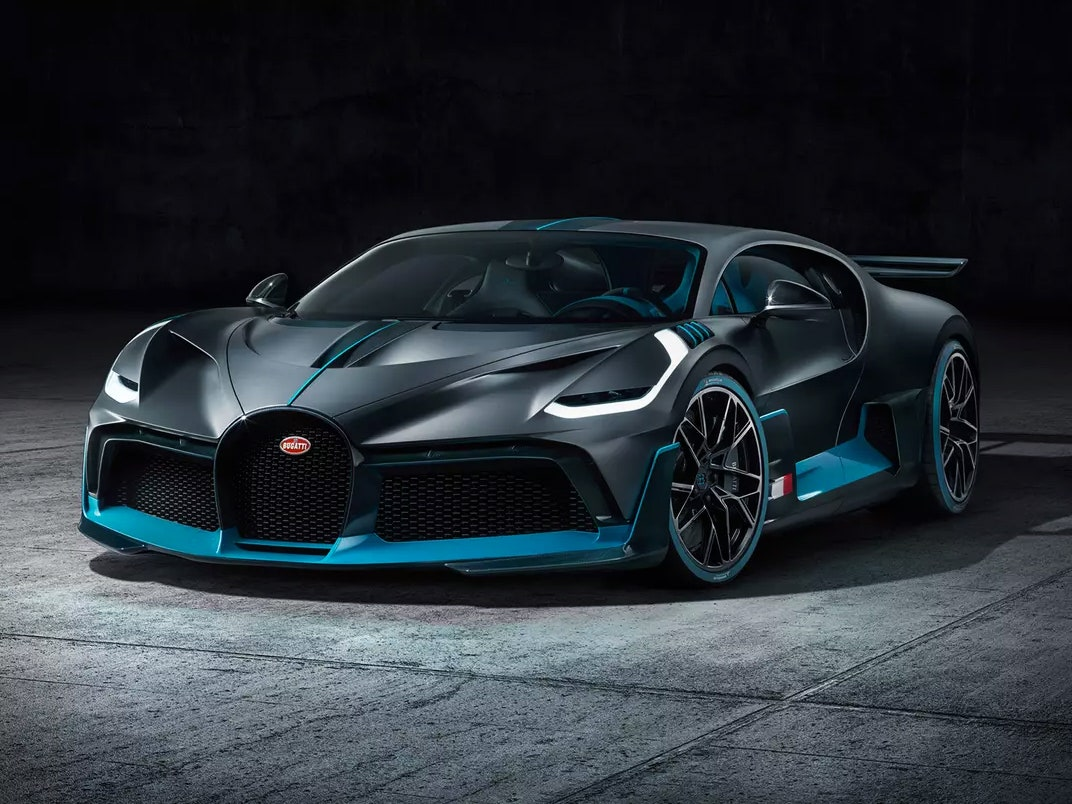

In [3]:
# Image
Image.open('DIVO1.jpg')

In [4]:
# Setting torch device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [5]:
def load_image(image, image_size, device):
    # Creating a RGB image instance
    raw_image = Image.open(image).convert('RGB')

    # image size
    w, h = raw_image.size

    # Transforming the image as per the model
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size), interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
    ])

    tensor_img = transform(raw_image).unsqueeze(0).to(device)
    return tensor_img

## Image Caption

In [6]:
image_size = 384
image_path = 'DIVO1.jpg'
model_path = 'model_base_capfilt_large.pth'

image = load_image(image=image_path,
                   image_size=image_size,
                   device=device)

model = blip_decoder(pretrained=model_path, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

with torch.no_grad():
    # Beam Search
    caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5)[0]
    print('caption: '+ caption.capitalize())

reshape position embedding from 196 to 576
load checkpoint from model_base_capfilt_large.pth
caption: The bugatti supercar


In [7]:
with torch.no_grad():
    # Nucleus Sampling
    caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5)
    print('caption: '+ caption[0].capitalize())

caption: The bugatt supercars concept vehicle


## Visual Question Answer VQA

In [8]:
image_size = 384
model_path = 'model_base_vqa_capfilt_large.pth'

model = blip_vqa(pretrained=model_path, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

question = 'what is the color of the car?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate')
    print('Answer: ' + answer[0].capitalize())

reshape position embedding from 900 to 576
load checkpoint from model_base_vqa_capfilt_large.pth
Answer: Gray and black


In [9]:
question = 'where is the car?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate')
    print('Answer: ' + answer[0].capitalize())

Answer: In garage


In [10]:
question = 'what is the color of the background?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate')
    print('Answer: ' + answer[0].capitalize())

Answer: Black


In [11]:
question = 'How many wheels are visible?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate')
    print('Answer: ' + answer[0].capitalize())

Answer: 3


In [12]:
question = 'Are there any rear mirrors, if yes then how many?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate')
    print('Answer: ' + answer[0].capitalize())

Answer: No
